In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import importlib
import download_clean_data as dc
import ipca
import metrics
import kernel_regression as kr
import validaton as val
import pickle
importlib.reload(dc) 
importlib.reload(ipca)
importlib.reload(metrics)
importlib.reload(kr)
importlib.reload(val)

<module 'validaton' from '/Users/matteoferrazzi/Documents/GitHub/ML-project-2/validaton.py'>

In [3]:
folder_path = "/Users/matteoferrazzi/Documents/GitHub/ML-project-2/Data/monthly_data"
N = 100
start_date = 20000000
ending_date = 20060000
data, ret = dc.download_clean_data(folder_path, start_date, ending_date,N)

In [25]:
#with open('dict_rq.pickle', 'rb') as handle:
#    dict_rq = pickle.load(handle)

with open('dict_gaussian.pickle', 'rb') as handle:
    dict_gaussian = pickle.load(handle)

with open('dict_IPCA_reg.pickle', 'rb') as handle:
    dict_IPCA_reg = pickle.load(handle)

In [6]:
dict_gaussian

{('Gaussian', 10, 10, 10): array([0.10310083]),
 ('Gaussian', 10, 1, 10): array([0.14546635]),
 ('Gaussian', 10, 0.1, 10): array([0.2089313]),
 ('Gaussian', 10, 0.01, 10): array([0.24891582]),
 ('Gaussian', 10, 0.001, 10): array([0.19878576]),
 ('Gaussian', 10, 0.0001, 10): array([0.18481917]),
 ('Gaussian', 1, 10, 10): array([0.1454745]),
 ('Gaussian', 1, 1, 10): array([0.21068099]),
 ('Gaussian', 1, 0.1, 10): array([0.24622286]),
 ('Gaussian', 1, 0.01, 10): array([0.21451392]),
 ('Gaussian', 1, 0.001, 10): array([0.22016795]),
 ('Gaussian', 1, 0.0001, 10): array([0.21748974]),
 ('Gaussian', 0.1, 10, 10): array([0.21058153]),
 ('Gaussian', 0.1, 1, 10): array([0.24455398]),
 ('Gaussian', 0.1, 0.1, 10): array([0.23666269]),
 ('Gaussian', 0.1, 0.01, 10): array([0.22839449]),
 ('Gaussian', 0.1, 0.001, 10): array([0.22716759]),
 ('Gaussian', 0.1, 0.0001, 10): array([0.22821648]),
 ('Gaussian', 0.01, 10, 10): array([0.26220109]),
 ('Gaussian', 0.01, 1, 10): array([0.24285754]),
 ('Gaussian'

In [73]:
def surface(dictionary, lambdas1, lambdas2, i, j):
    
    z = np.zeros((len(lambdas1), len(lambdas2)))
    for l1, lambda1 in enumerate(lambdas1):
        for l2, lambda2 in enumerate(lambdas2):
            temp = []
            for k,v in dictionary.items():
                if k[i] == lambda1 and k[j] == lambda2:
                    temp.append(v)
            if temp != []:
                z[l1, l2] = max(temp)
    
    return z

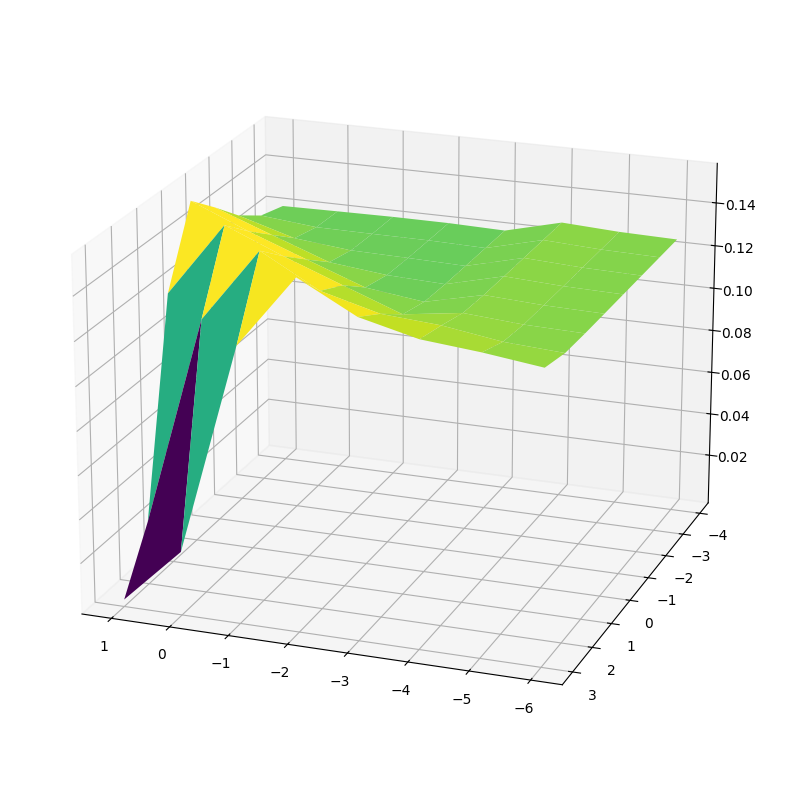

In [94]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]))
z = surface(dict_IPCA_reg, list([10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]), list([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]), 1, 2)
ax.plot_surface(np.log10(np.array(x)), np.log10(np.array(y)), np.array(z), cmap='viridis')
ax.view_init(20, 110)

In [35]:
max(dict_IPCA_reg, key=dict_IPCA_reg.get)

('IPCA_reg', 0.01, 1000)